In [6]:
import matplotlib.pyplot as plt
import pylab
import scipy
import numpy as np
%matplotlib inline
import os
import time
from IPython.display import clear_output, Image, display
from matplotlib import colors
import math
import random

In [12]:
class Vaccum():
    def __init__(self, size = 7, density = 0.2):
        '''
        Inputs:
            
            size (int): size of room. Default: 5.
            density (float): between 0 to 1. Density of obstacles in tne room.
        '''

        self.size = size
        self.density = density

    def initialize(self):
        '''
        Initialize the room set up. 1 = dirty floor, 2 = an obstacle
        0 = cleaned floor (the random starting tile is set to 0).
        '''

        self.state = scipy.ones((self.size, self.size))
        random_indeces_obstacle = scipy.random.choice(range(self.size ** 2),
                                                      size=int(self.density *
                                                            self.size ** 2),
                                                      replace=False)
        self.state.flat[random_indeces_obstacle] = 2
     
        # choose random starting point:
        self.start_row = int(random.choice(np.arange(math.sqrt(self.size))))
        self.start_col = int(random.choice(np.arange(math.sqrt(self.size))))
        # starting point is now clean:
        self.state[(self.start_row)][(self.start_col)] = 0    
        # list of all the tiles visited:
        self.path = [(self.start_row, self.start_col)]        
        

        # setting up the simulation percentage analysis and time steps
        self.base = float(self.size**2) - float(int(self.density * self.size ** 2))
        
        self.step = 0
        self.percentages = 0
        
    def movement(self):
        '''
        Defines the movement of the vacuum and the directions it can go in.

        '''
        
        up = [-1,0]
        down = [1,0]
        left = [0,-1]
        right = [0,1]
        upleft = [-1,-1]
        upright = [-1,1]
        downleft = [1, -1]
        downright = [1,1]
        
        self.direction_list = [up, down, left, right, upleft, upright,
                               downleft, downright]
        self.direction = random.choice(self.direction_list)
        
    def strategy_1(self):
        '''
        Random strategy. Each time step choose a random tile to visit,
        out of possible neighbors.
        '''
        
        neighbors_func = lambda x, y : [(x2, y2) for x2 in range(x-1, x+2)
                                        for y2 in range(y-1, y+2)
                                        if (-1 < x <= self.size and
                                        -1 < y <= self.size and
                                        (x != x2 or y != y2) and
                                        (0 <= x2 <= self.size-1) and
                                        (0 <= y2 <= self.size-1))]
        
        # neighbors of the last visited tile:
        neighbors = neighbors_func(self.path[-1][0],self.path[-1][1])
            
            
        next_tile = random.choice(neighbors)
        
        # make sure the next tile is not an obstacle
        while self.state[next_tile] == 2:
            neighbors.remove(next_tile)
            if len(neighbors)>0:
                next_tile = random.choice(neighbors)
            else:
                return(None)
        self.path.append(next_tile) # add next tile to the end of the path
        # set next tile to 0 (cleaned):
        self.state[self.path[-1][0]][self.path[-1][1]] = 0 
        # advance simulation step by 1:
        self.step += 1 
        # update percentage of clean tiles
        self.percentages = float(len(set(self.path)))/self.base 
        
    def strategy_2(self):
        '''
        Semi-random. Choose an available tile out of all neighbors, and then
        keep going in the same direction until hitting an obstacle or wall.
        When this happens, choose a random neighbor tile and advance until
        hitting an obstacle or wall.
        '''
        
        current_tile = self.path[-1]
        next_tile_temp = (current_tile[0] + self.direction[0],
                          current_tile[1] + self.direction[1])
        
        # making sure chosen next tile is not an obstacle or wall
        count_max = 9
        count = 0
        while next_tile_temp[0] not in range(self.size) or next_tile_temp[1] not in range(self.size) or self.state[next_tile_temp] == 2:
            self.direction = random.choice(self.direction_list)
            next_tile_temp = (current_tile[0]+self.direction[0],
                              current_tile[1] + self.direction[1])
            count += 1
            if count > count_max:
                break
        else:
            next_tile = next_tile_temp
            # add next tile to the end of the path:
            self.path.append(next_tile) 
            # set next tile to 0 (cleaned):
            self.state[self.path[-1][0]][self.path[-1][1]] = 0 
        
        self.step += 1 # advance simulation step by 1
            
        # update percentage of clean tiles
        self.percentages = float(len(set(self.path)))/self.base 
        
    def visualize(self):
        cmap = colors.ListedColormap(['white','grey','red'])
        bounds=[0,0.99,1.99,2]
        norm = colors.BoundaryNorm(bounds, cmap.N)
        img = plt.imshow(self.state, cmap=cmap, norm=norm)
        plt.colorbar(img, cmap=cmap, norm=norm, boundaries=bounds,
                     ticks=[0,0.99,1.99,2])
        plt.title('Step: ' + str(self.step))



# Visualize one time step

<Figure size 432x288 with 0 Axes>

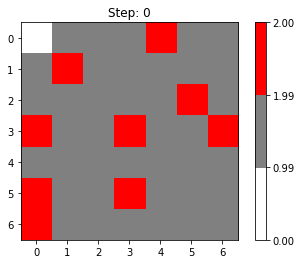

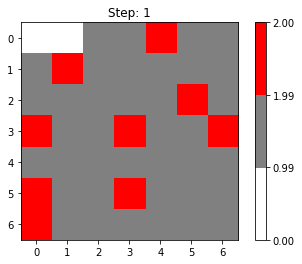

<Figure size 432x288 with 0 Axes>

In [14]:
sim = Vaccum()

sim.initialize()
sim.movement()
sim.visualize()
plt.figure()
for i in range(1):
    sim.strategy_1()
sim.visualize()
plt.figure()

# Visualize multiple time steps

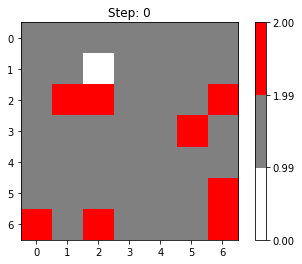

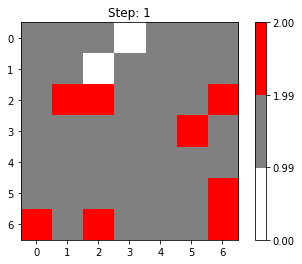

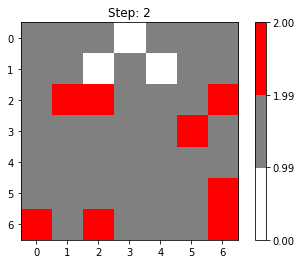

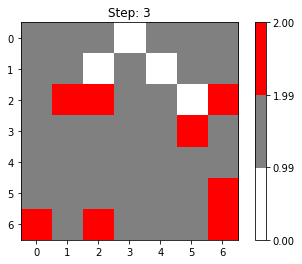

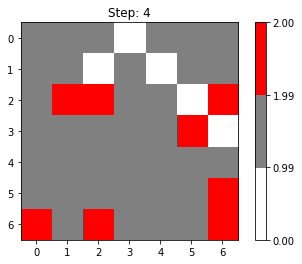

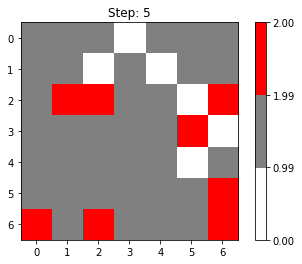

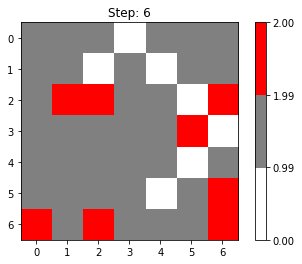

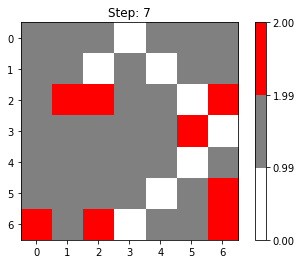

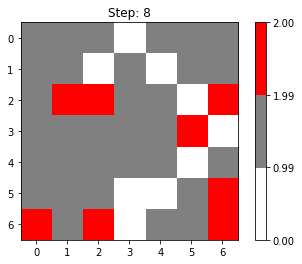

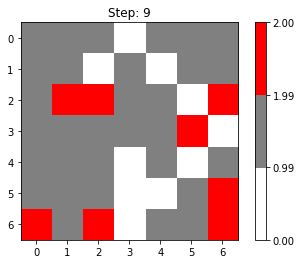

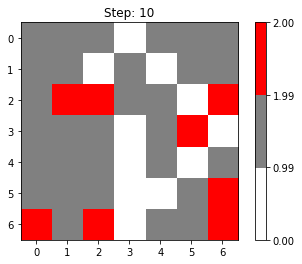

<Figure size 432x288 with 0 Axes>

In [15]:
sim = Vaccum()

sim.initialize()
sim.movement()
sim.visualize()
plt.figure()
for i in range(10): # how many plots
    for i in range(1): # how big timesteps jumps
        sim.strategy_2()
    sim.visualize()
    plt.figure()
 

# Numerical results of the model

In [16]:
# after x steps, what is the average percentage clean
# only shows average for one density

def avg_1(times, steps, density):
    percent_avg_list = []
    
    for i in range(times): # how many times to set up simulation
        sim = Vaccum(density = density)
        sim.initialize()
        sim.movement()
        percent = []
        for i in range(steps): # how many steps per set up
            sim.strategy_1()
        percent.append(sim.percentages)
        percent_avg_list.append(np.mean(percent))
    percent_avg = np.mean(percent_avg_list)
    print 'percentage of clean floor after', steps, 'steps:', percent_avg
    
    
def avg_2(times, steps, density):
    percent_avg_list = []
    
    for i in range(100): # how many times to set up simulation
        sim = Vaccum(density = density)
        sim.initialize()
        sim.movement()
        percent = []
        for i in range(steps): # how many steps per set up
            sim.strategy_2()
        percent.append(sim.percentages)
        percent_avg_list.append(np.mean(percent))
    percent_avg = np.mean(percent_avg_list)
    print 'percentage of clean floor after', steps, 'steps:', percent_avg
    
desnity = 0.7
print 'Strategy 1:'
avg_1(times = 500, steps = 50, density = desnity)
avg_1(times = 500, steps = 100, density = desnity)
avg_1(times = 500, steps = 500, density = desnity)
print 'Strategy 2:'
avg_2(times = 500, steps = 50, density = desnity)
avg_2(times = 500, steps = 100, density = desnity)
avg_2(times = 500, steps = 500, density = desnity)
#sim.visualize()
#plt.figure()


Strategy 1:
percentage of clean floor after 50 steps: 0.37933333333333336
percentage of clean floor after 100 steps: 0.3801333333333334
percentage of clean floor after 500 steps: 0.4173333333333334
Strategy 2:
percentage of clean floor after 50 steps: 0.36733333333333335
percentage of clean floor after 100 steps: 0.3733333333333334
percentage of clean floor after 500 steps: 0.4753333333333334


# Visualize strategies' effectiveness over different room densities

In [17]:
def visualizations(densities, times, steps, strategy):
    '''
    Visualize the output of the model as the relationship between density and average flow rate.
    '''
    mean_percentages = []
    std_percentages = []
    for dens in densities: # for each density:
        percentages = []
        for j in range(times): # for each density, set up the simulation x times
            sim = Vaccum(density=dens)
            sim.initialize()
            sim.movement()
            for i in range(steps): # how many steps should each simulation run for?
                if strategy == 1:
                    sim.strategy_1()
                else:
                    sim.strategy_2()
            percentages.append(sim.percentages)
        mean_percentages.append(np.mean(percentages))
        std_percentages.append(np.std(percentages))

    plt.errorbar(scipy.linspace(0,0.6,50), mean_percentages, xerr=0, yerr= 1.96* np.array(std_percentages))
    plt.plot(densities, mean_percentages)
    plt.title('percentage clean over room density (after {} steps)'.format(steps ))
    plt.ylabel('Percentages')
    plt.xlabel('Density')
    plt.ylim(0,1)
    plt.show()


## Strategy 1 effectiveness

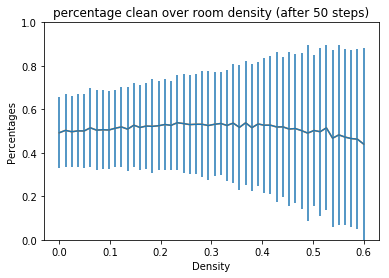

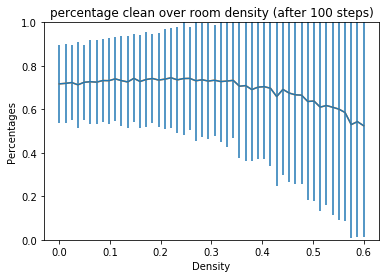

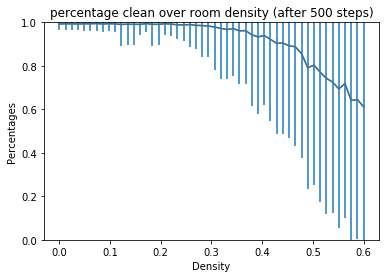

In [20]:
visualizations(np.linspace(0, 0.6, 50), times = 500, steps = 50, strategy = 1)
visualizations(np.linspace(0, 0.6, 50), times = 500, steps = 100, strategy = 1)
visualizations(np.linspace(0, 0.6, 50), times = 500, steps = 500, strategy = 1)

## Strategy 2 effectiveness

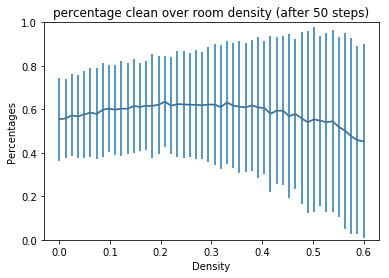

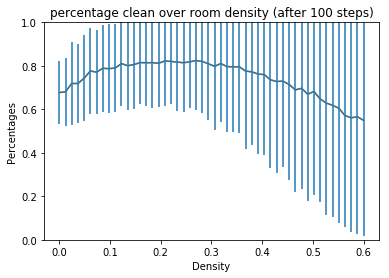

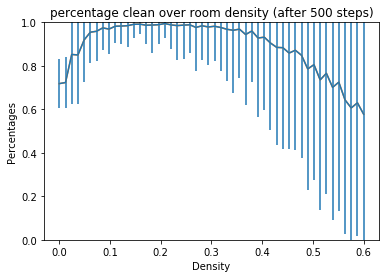

In [21]:
visualizations(np.linspace(0, 0.6, 50), times = 500, steps = 50, strategy = 2)
visualizations(np.linspace(0, 0.6, 50), times = 500, steps = 100, strategy = 2)
visualizations(np.linspace(0, 0.6, 50), times = 500, steps = 500, strategy = 2)